Loaded data shape: (1000, 500)


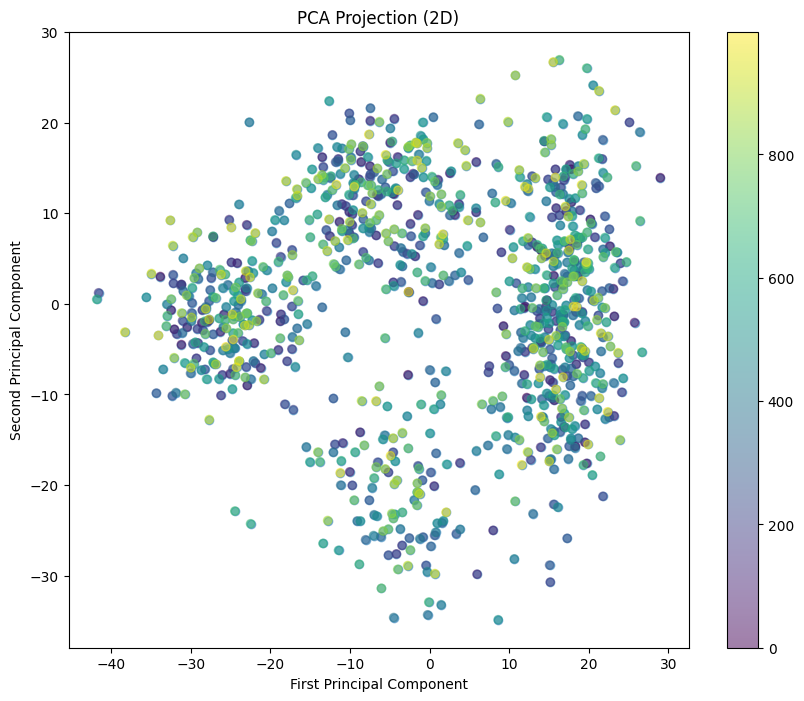

/home/saimon7/Documents/CSE-472-Machine-Learning/env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


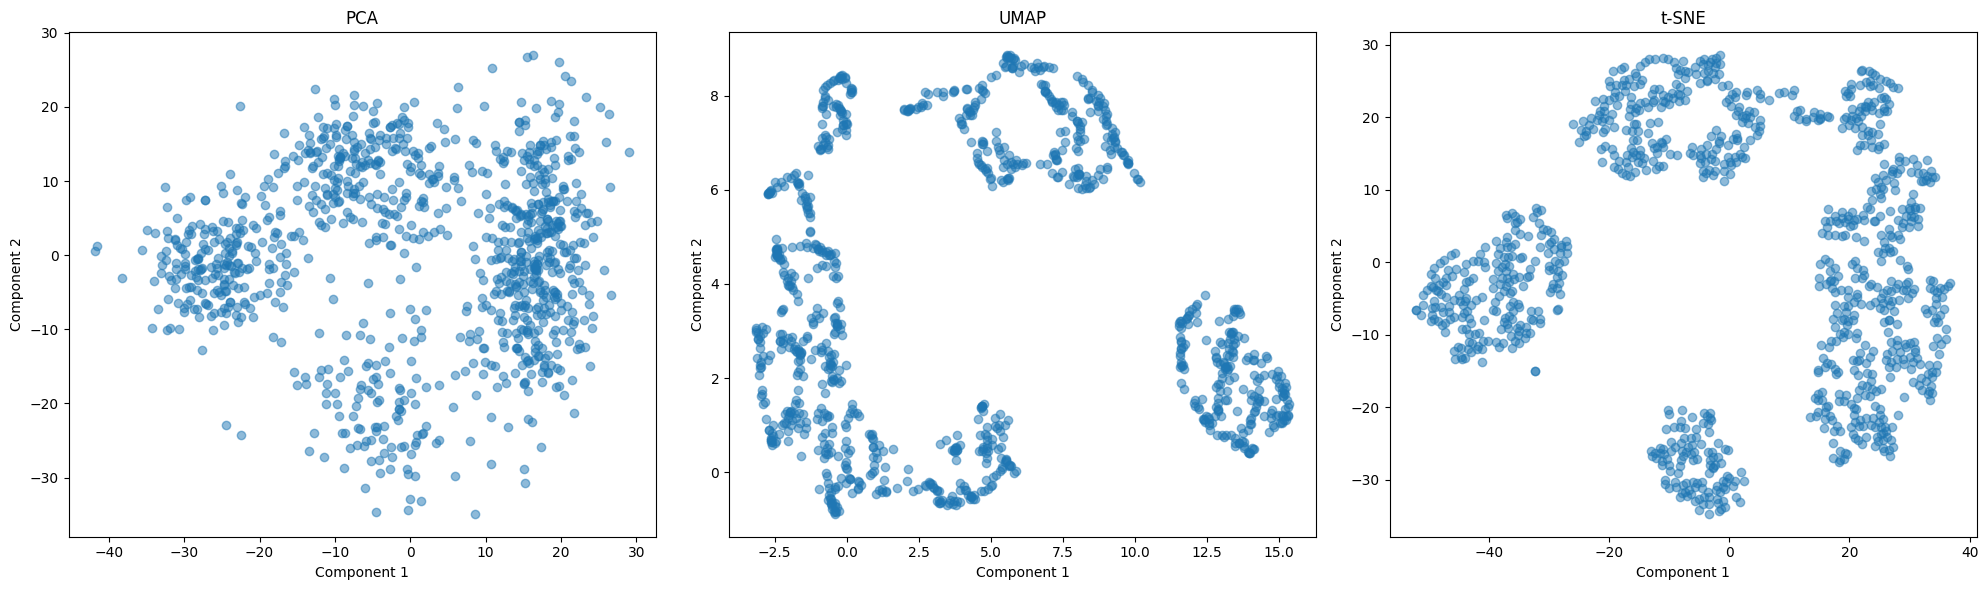


Top 5 eigenvalues:
[289.43050004 143.28854242   1.17118381   1.08539322   1.0289504 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.manifold import TSNE

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.eigenvalues = None
        self.mean = None
        self.scaler = StandardScaler()
        
    def fit_transform(self, X):
        # Step 1: Standardize the data
        X_scaled = self.scaler.fit_transform(X)
        self.mean = self.scaler.mean_
        
        # Step 2: Compute covariance matrix
        covariance_matrix = np.cov(X_scaled.T)
        
        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Sort eigenvalues and eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        self.eigenvalues = eigenvalues[idx]
        self.components = eigenvectors[:, idx]
        
        # Step 4: Select top n_components eigenvectors
        self.components = self.components[:, :self.n_components]
        
        # Step 5: Project data onto principal components
        X_transformed = np.dot(X_scaled, self.components)
        
        return X_transformed

def load_data(filename):
    """Load space-separated data file"""
    return np.loadtxt(filename)

def plot_pca_scatter(X_pca, title="PCA Projection (2D)"):
    """Create scatter plot of PCA-transformed data"""
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.colorbar(plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                            c=range(len(X_pca)), cmap='viridis', alpha=0.5))
    plt.show()

def plot_dimensionality_reduction_comparison(X):
    """Create and plot PCA, UMAP, and t-SNE visualizations"""
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    axes[0].set_title('PCA')
    
    try:
        # UMAP
        from umap import UMAP  # Local import within try block
        reducer = UMAP(random_state=42)
        X_umap = reducer.fit_transform(X)
        axes[1].scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
        axes[1].set_title('UMAP')
    except:
        # If UMAP fails, create an empty plot with message
        axes[1].text(0.5, 0.5, 'UMAP Unavailable', 
                    horizontalalignment='center',
                    verticalalignment='center')
        axes[1].set_title('UMAP (Failed)')
    
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
    axes[2].set_title('t-SNE')
    
    # Add labels for all plots
    for ax in axes:
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
    
    plt.tight_layout()
    plt.show()

def plot_explained_variance(eigenvalues):
    """Plot explained variance ratio and cumulative explained variance"""
    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(explained_variance_ratio) + 1), 
             explained_variance_ratio, 'bo-')
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
             cumulative_variance_ratio, 'ro-')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.axhline(y=0.95, color='k', linestyle='--', label='95% Threshold')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the data
    data = load_data("pca_data.txt")
    print(f"Loaded data shape: {data.shape}")
    
    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)
    
    # Create visualizations
    # 1. PCA scatter plot
    plot_pca_scatter(X_pca)
    
    # 2. Explained variance analysis
    # plot_explained_variance(pca.eigenvalues)
    
    # 3. Comparison of dimensionality reduction techniques
    plot_dimensionality_reduction_comparison(data)
    
    # Print additional information
    print("\nTop 5 eigenvalues:")
    print(pca.eigenvalues[:5])
    
    # explained_variance_ratio = pca.eigenvalues / np.sum(pca.eigenvalues)
    # print("\nExplained variance ratio of first two components:",
    #       explained_variance_ratio[:2].sum())